# Explore here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 0 - Cargar de datos y revisión General

In [3]:
# 0.0 - Cargamos el dataframe
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")  
df.to_csv("/workspaces/Jacinto-Proyecto-K-vecinos-m-s-Cercanos/data/raw/winequality-red.csv", index=False)


In [4]:
# 0.1 - Revisamos las primeras filas del dataframe
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 0.2 - Revisamos las ultimas filas del dataframe
df.tail() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# 0.3 - Vemos las dimensiones en filas y columnas del dataframe
df.shape

(1599, 12)

In [7]:
# 0.4 Vemos un resumen detallado del dataframe para conocer el tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# 0.5 - Observamos los valores unicos de cada columna del df
n_unicos = df.nunique()
n_unicos

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
# 0.6 - Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
df = df.drop(columns=cols_constantes)

print(f"Columnas eliminadas: {list(cols_constantes)}")

Columnas eliminadas: []


In [10]:
# 0.7 - Comprobar la presencia de filas duplicadas
df.duplicated().sum()

np.int64(240)

In [11]:
# 0.8 - Cambiamos filas por columnas y vemos si hay valores duplicados
df.T.duplicated(keep=False)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
#0.9 - Eliminamos duplicados
df = df.drop_duplicates()

## 1 - Distribución de las variables y relación entre variables

In [13]:
# 1.1 - Hacemos la clasificación indicada en las instrucciones
def quality_classification(valor):
    if valor <= 4:
        return 0  # Baja calidad
    elif valor <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

df['quality_classification'] = df['quality'].apply(quality_classification)

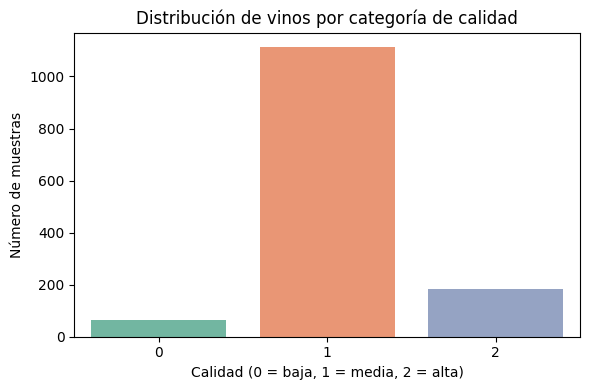

In [ ]:
# Visualización de la clasificación realizada
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="quality_classification", hue="quality_classification", palette="Set2", legend=False)
plt.title("Distribución de vinos por categoría de calidad")
plt.xlabel("Calidad (0 = baja, 1 = media, 2 = alta)")
plt.ylabel("Número de muestras")
plt.tight_layout()
plt.show()

In [14]:
# 1.2 - Separar variables predictoras (X) y variable objetivo (y)

X = df.drop(columns=["quality", "quality_classification"])  # Excluimos las columnas de calidad
y = df["quality_classification"]

In [15]:
# 1.3 - División del dataset en entrenamiento y prueba (80/20)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [16]:
# 1.4 - Escalado de variables (imprescindible para KNN)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2 - Entrenamiento inicial del modelo KNN y evaluación

In [19]:
# 2.1 - Entrenar el modelo con k=5 como valor inicial
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# 2.2 - Realizar predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

In [21]:
# 2.3 - Evaluar el rendimiento del modelo
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.82

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.17      0.08      0.11        13
           1       0.86      0.92      0.89       222
           2       0.59      0.46      0.52        37

    accuracy                           0.82       272
   macro avg       0.54      0.49      0.50       272
weighted avg       0.79      0.82      0.80       272



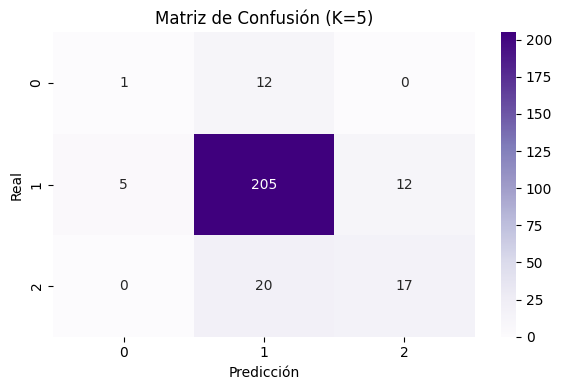

In [22]:
# 2.4 - Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusión (K=5)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Explicación de los resultados

Precisión general del 82 %: muy buen punto de partida para un clasificador KNN sin optimización aún.

Dominio claro de la clase 1 (calidad media):

Tiene un soporte mayor (222 muestras) y métricas muy altas: precision 0.86, recall 0.92, f1-score 0.89.

El modelo prioriza bien esta clase, lo cual es lógico al ser la más representada.

Rendimiento bajo en clase 0 (baja calidad):

Muy pocos ejemplos (solo 13), lo que lleva a recall 0.08 y f1-score 0.11.

El modelo tiene dificultades para detectar esta clase minoritaria.

Clase 2 (alta calidad):

Con 37 ejemplos, está algo mejor representada que la clase 0.

Recall de 0.46 indica que logra encontrar casi la mitad de los vinos realmente buenos, aunque queda bastante margen para mejorar.

Macro promedio vs promedio ponderado:

Macro avg (0.50) es bajo porque se penaliza por igual cada clase, y las clases minoritarias no se predicen bien.

Weighted avg (0.80) es más alto, ya que pondera por cantidad de muestras (y clase 1 domina).

## 3 - Optimización del número de vecinos (k)

In [23]:
# Rango de valores de k a evaluar
k_values = range(1, 21)
accuracies = []

# Bucle para evaluar cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

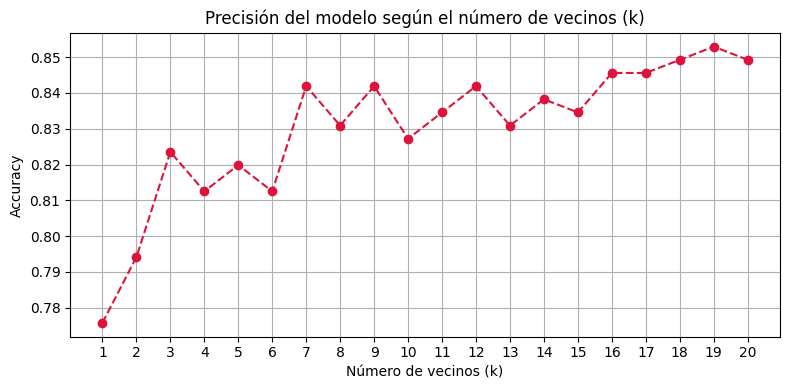

In [ ]:
# Visualización de la precisión para cada k
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='crimson')
plt.xticks(k_values)
plt.title("Precisión del modelo según el número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4 - Reentrenar el modelo con el mejor valor de k

In [35]:
# Encontrar el valor de k con mayor precisión
mejor_k = np.argmax(accuracies) + 1  # +1 porque range empieza en 1
print(f"Mejor valor de k: {mejor_k} con accuracy de {accuracies[mejor_k-1]:.2f}")

# Reentrenar el modelo con k óptimo
knn_final = KNeighborsClassifier(n_neighbors=mejor_k)
knn_final.fit(X_train_scaled, y_train)

# Predicciones finales
y_pred_final = knn_final.predict(X_test_scaled)

# Evaluación final
print(f"\nPrecisión final del modelo con k={mejor_k}: {accuracy_score(y_test, y_pred_final):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_final, zero_division=0))

Mejor valor de k: 19 con accuracy de 0.85

Precisión final del modelo con k=19: 0.85

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.86      0.98      0.92       222
           2       0.78      0.38      0.51        37

    accuracy                           0.85       272
   macro avg       0.55      0.45      0.48       272
weighted avg       0.81      0.85      0.82       272



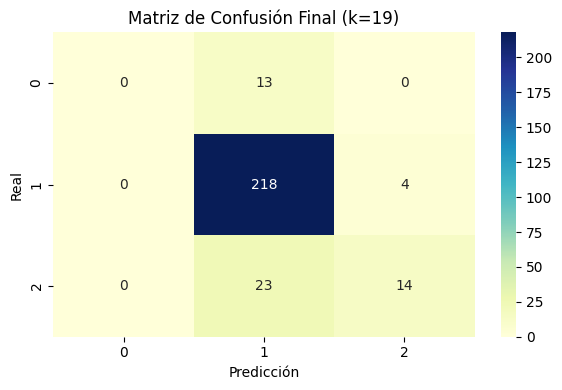

In [ ]:
#Visualización de la matriz de confusion final
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt="d", cmap="YlGnBu")
plt.title(f"Matriz de Confusión Final (k={mejor_k})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Explicacion de resultados:

Clase 1 (calidad media) sigue siendo la reina absoluta del modelo:

Precision 0.86, recall 0.98, f1-score 0.92

Se detectan correctamente la mayoría de los vinos de esta categoría.

Clase 2 (alta calidad) presenta mejoras en precisión (0.78), aunque con recall más bajo (0.38).

El modelo acierta en lo que predice como "alta", pero se le escapan muchos que deberían serlo.

Clase 0 (baja calidad): no predice ninguno como tal.

Eso es lo que provoca las advertencias: precision = 0 porque no se hizo ninguna predicción de esa clase.

Esto puede deberse al bajo número de ejemplos (solo 13) y a que k=19 empuja al modelo a favorecer la clase más común.